# Choosing a location for an oil well

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import os
import sweetviz as sv
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:75% !important; }</style>"))

### Importing data 

In [2]:
path1 = r'C:\Users\exeve\Downloads\geo_data_0.csv'
path2 = r'C:\Users\exeve\Downloads\geo_data_1.csv'
path3 = r'C:\Users\exeve\Downloads\geo_data_2.csv'

path4 = '/datasets/geo_data_0.csv'
path5 = '/datasets/geo_data_1.csv'
path6 = '/datasets/geo_data_2.csv'

try:
    if os.path.exists(path1):
        data1 = pd.read_csv(path1)
    elif os.path.exists(path4):
        data1 = pd.read_csv(path4)
except:
    print('Something went wrong with data1')
    
try:
    if os.path.exists(path2):
        data2 = pd.read_csv(path2)
    elif os.path.exists(path5):
        data2 = pd.read_csv(path5)
except:
    print('Something went wrong ith data2')
    
try:
    if os.path.exists(path3):
        data3 = pd.read_csv(path3)
    elif os.path.exists(path6):
        data3 = pd.read_csv(path6)
except:
    print('Something went wrong with data3')


### Region 1 overview

                                             |                                             | [  0%]   00:00 ->…


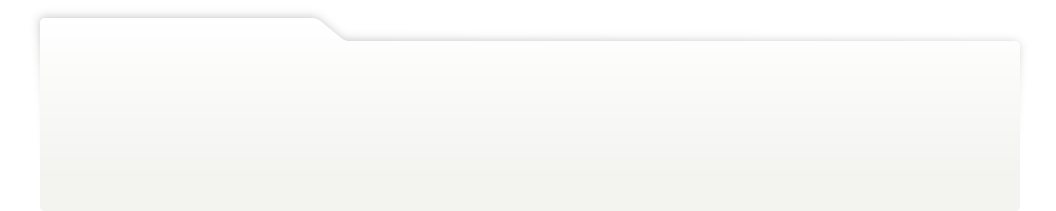
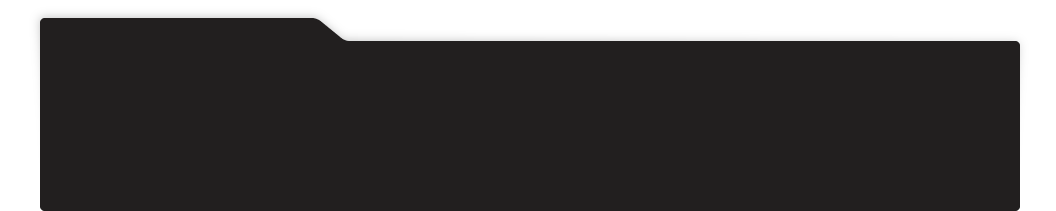
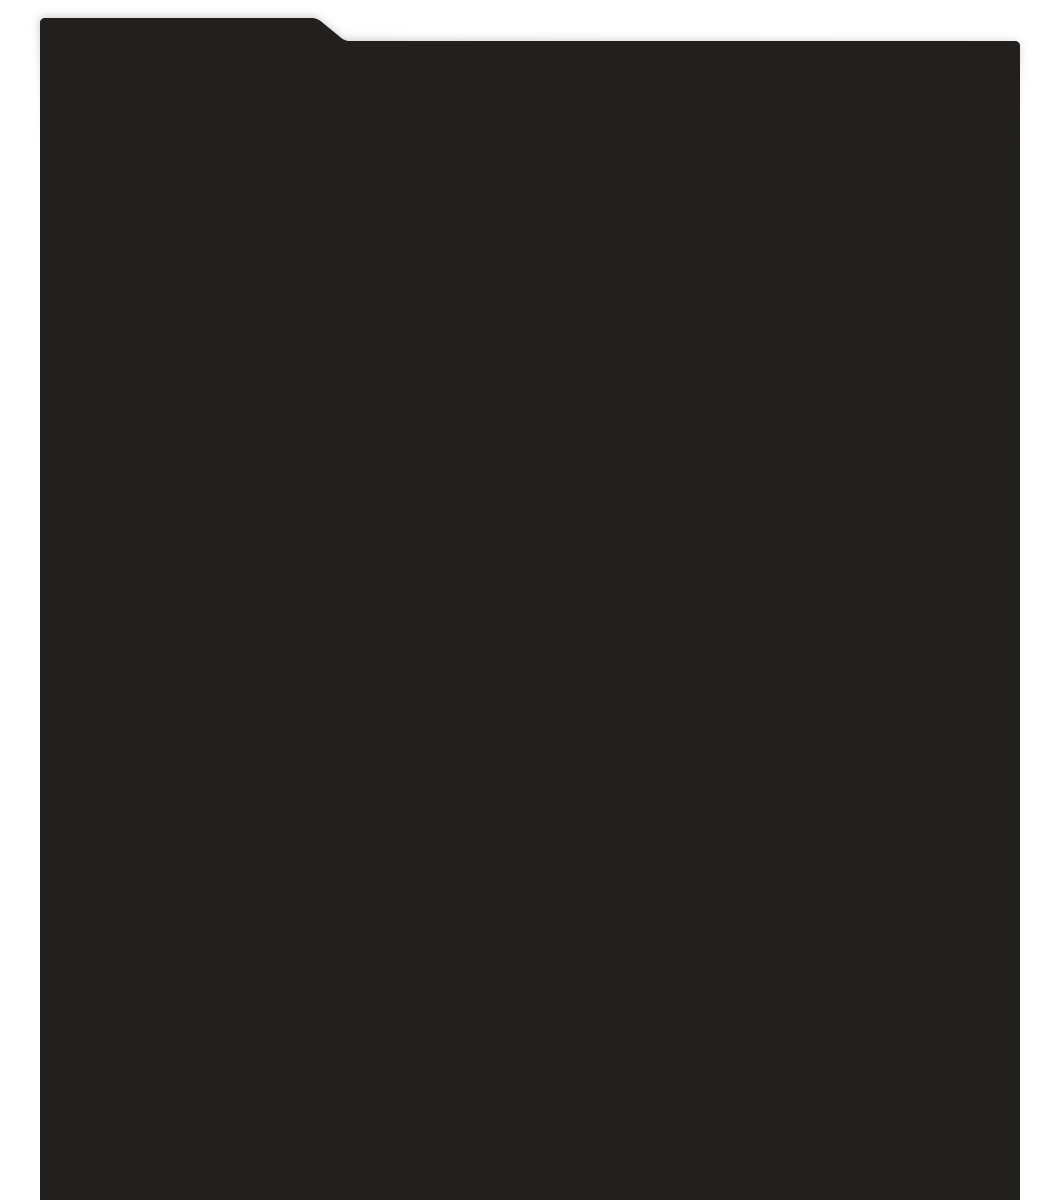
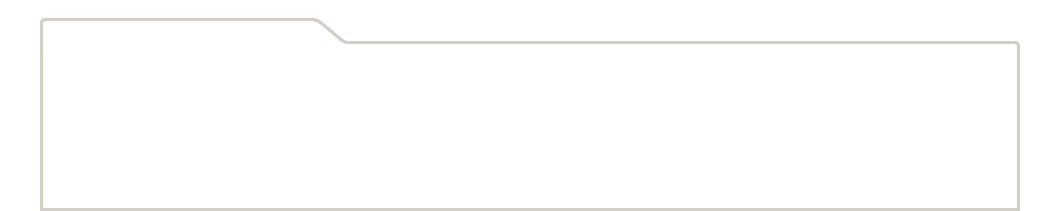
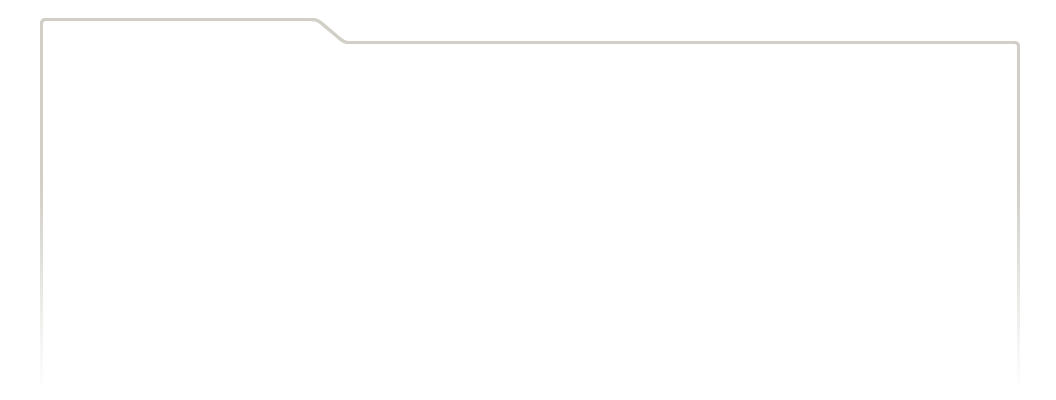
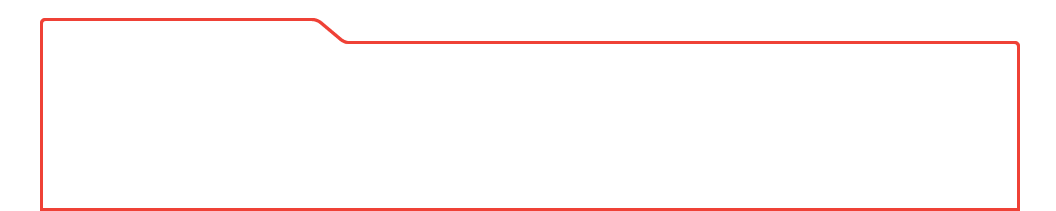
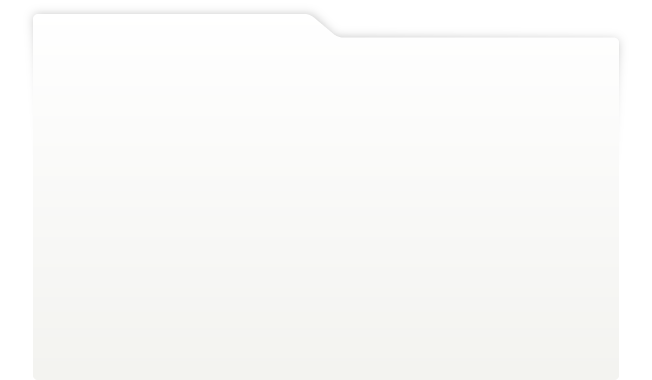
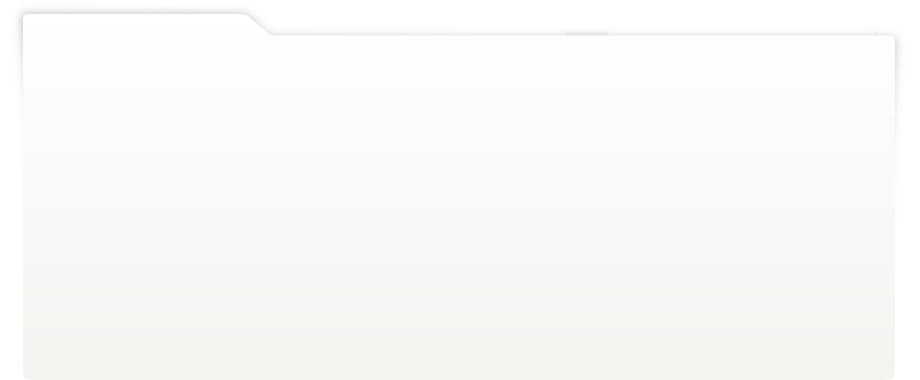
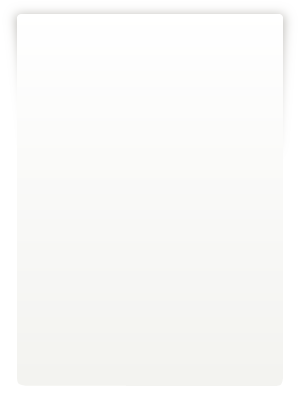
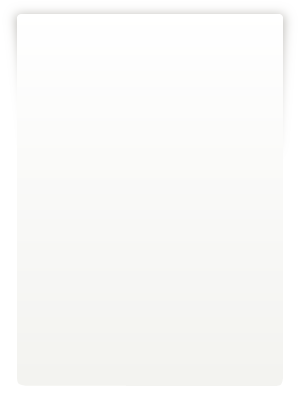
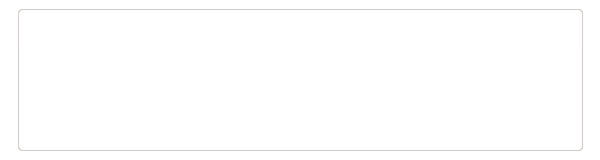
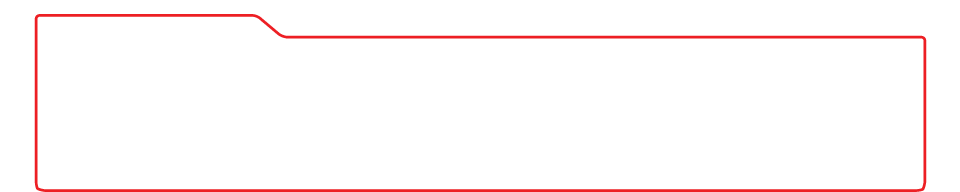
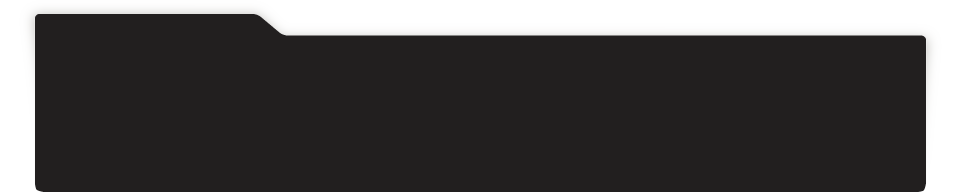
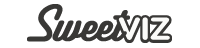
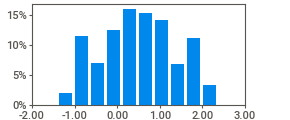
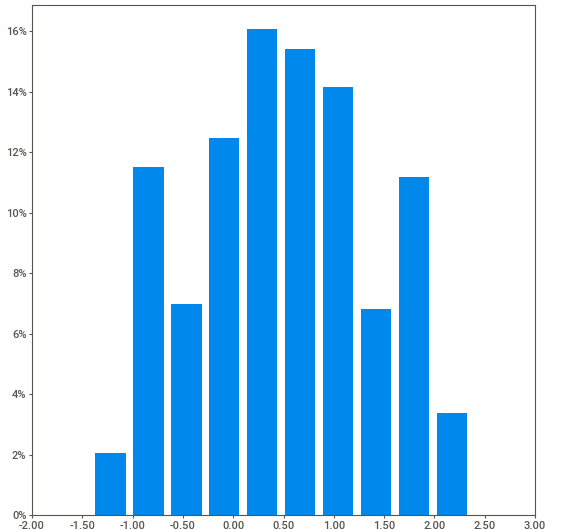
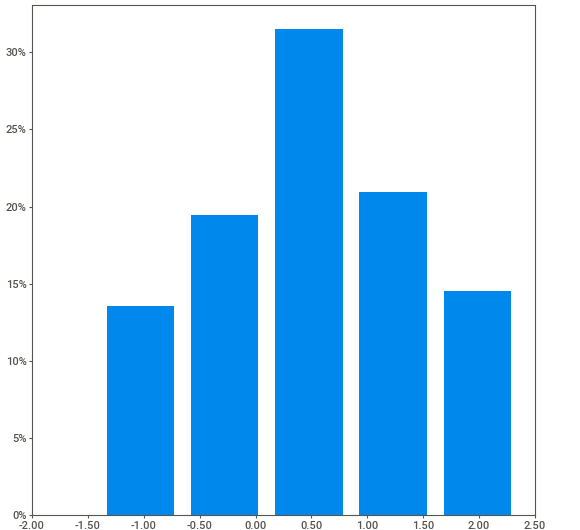
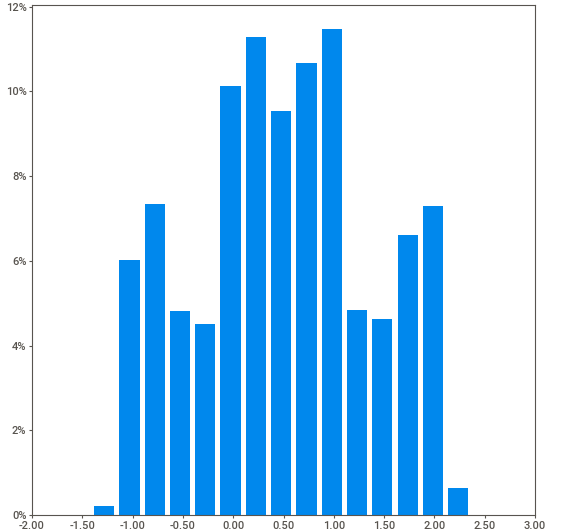
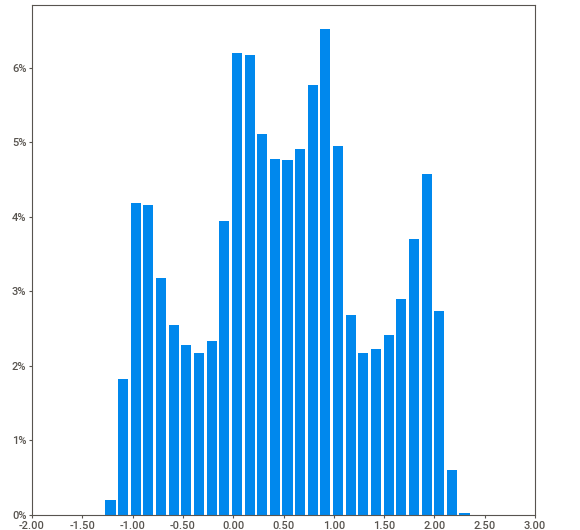
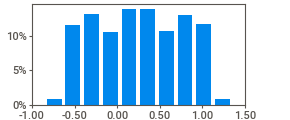
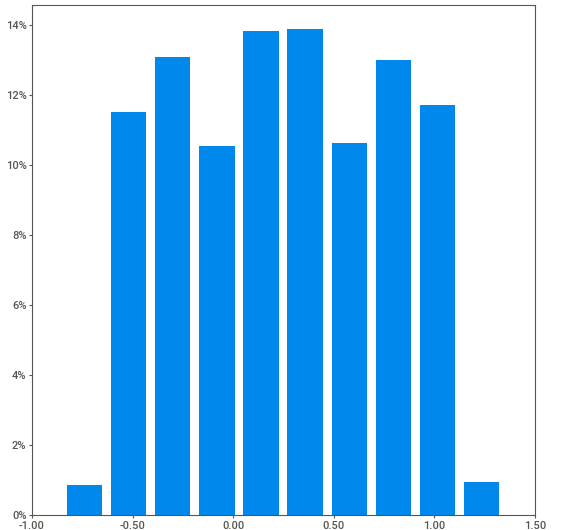
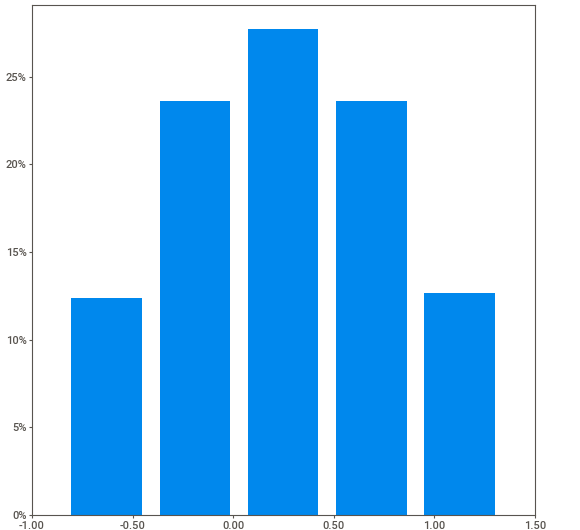
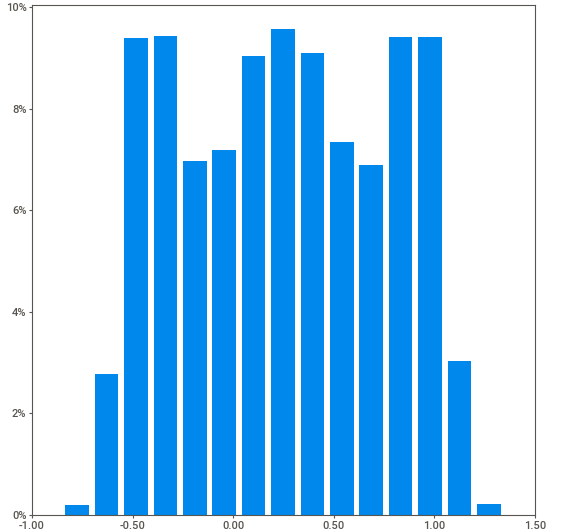
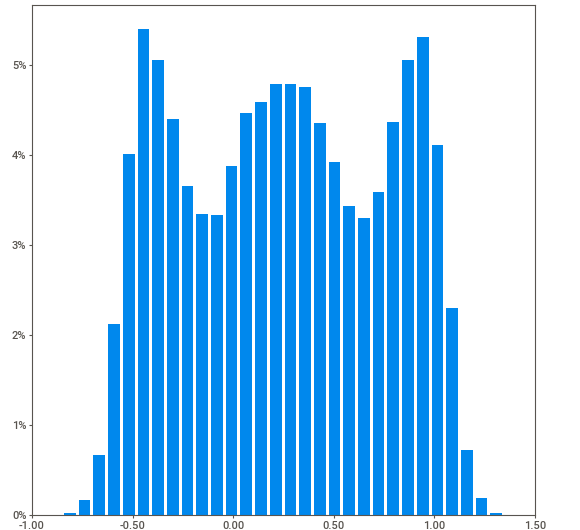
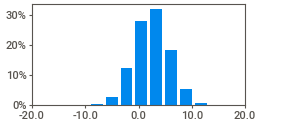
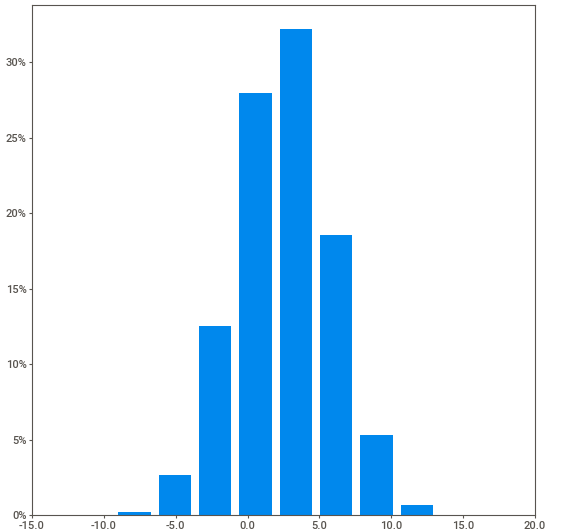
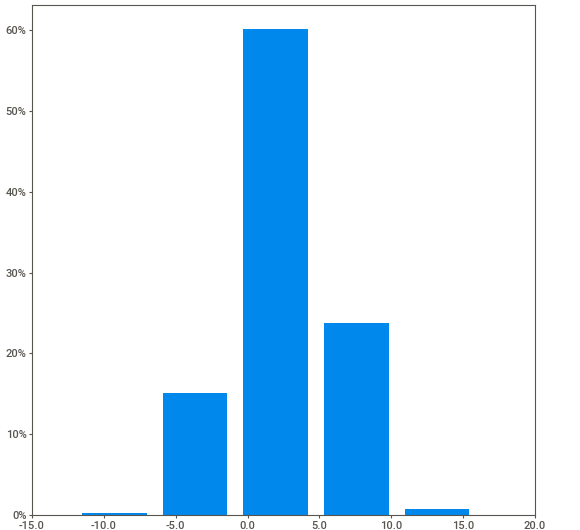
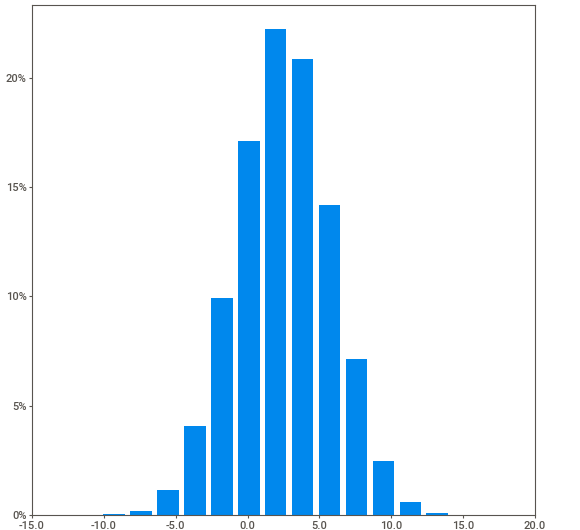
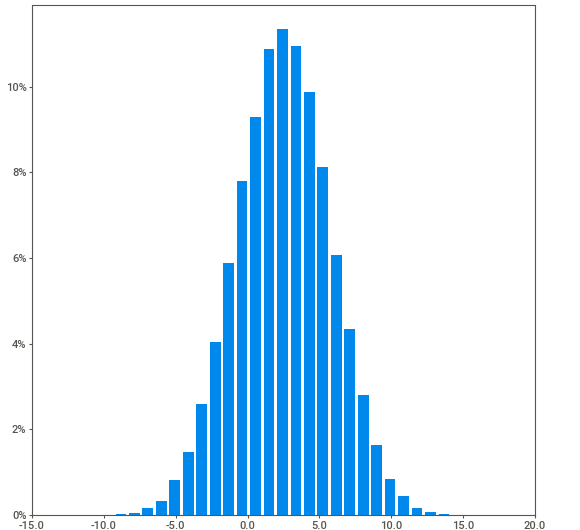
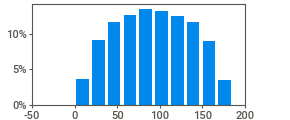
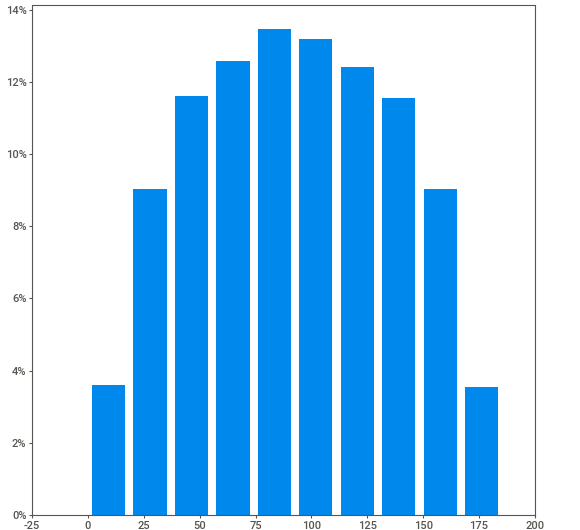
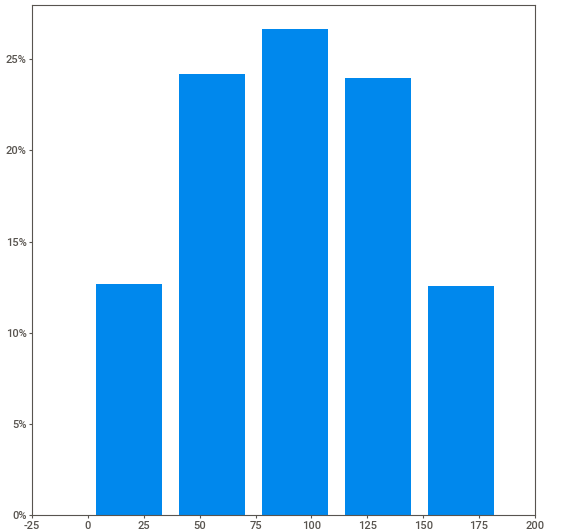
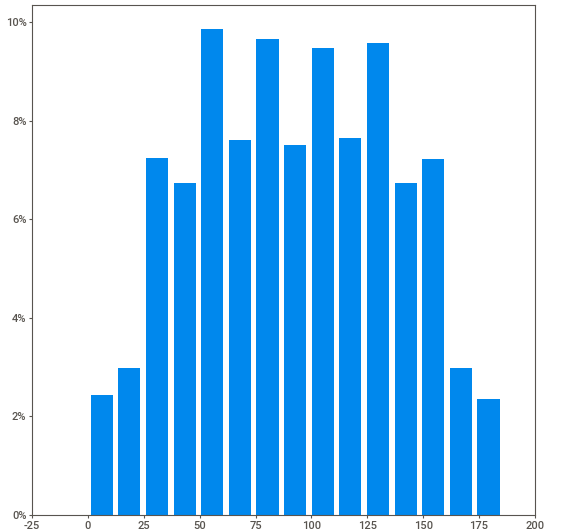
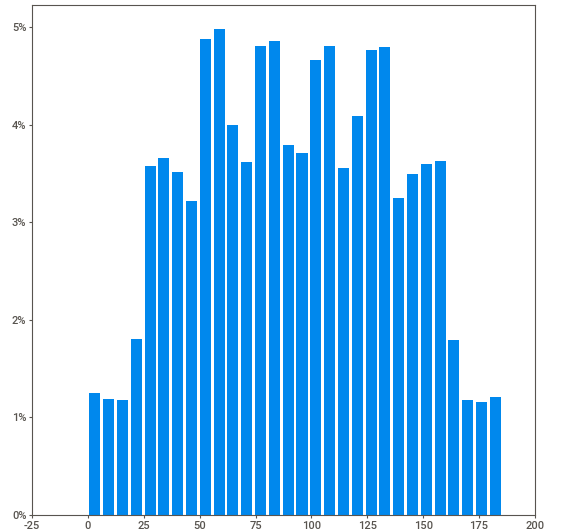
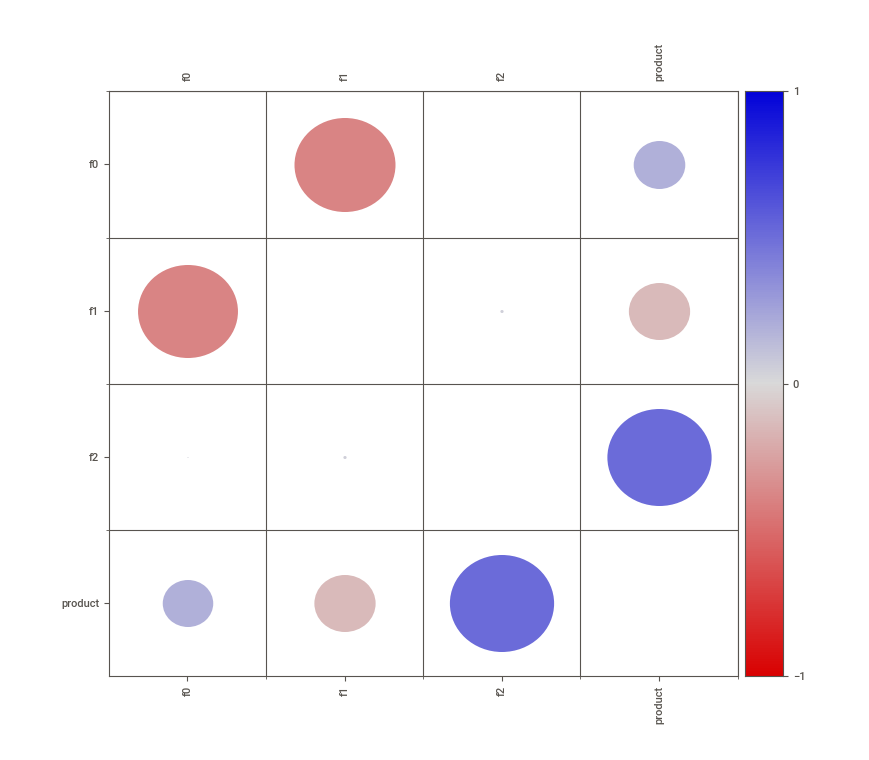
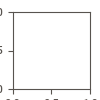

In [3]:
report = sv.analyze(data1)
report.show_notebook()

### Region 2 overview

                                             |                                             | [  0%]   00:00 ->…


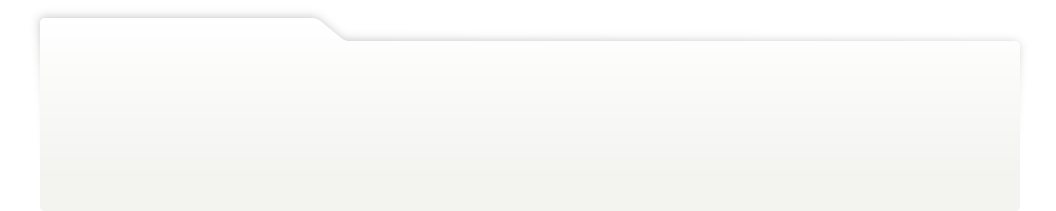
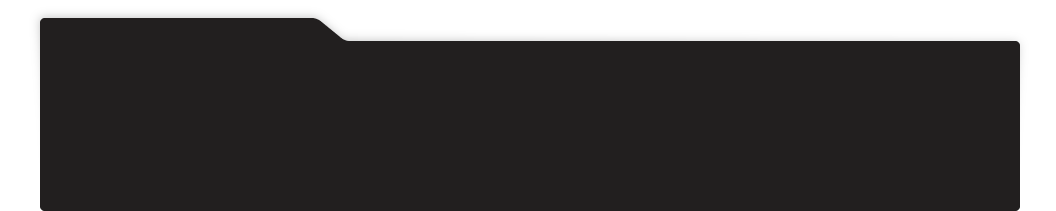
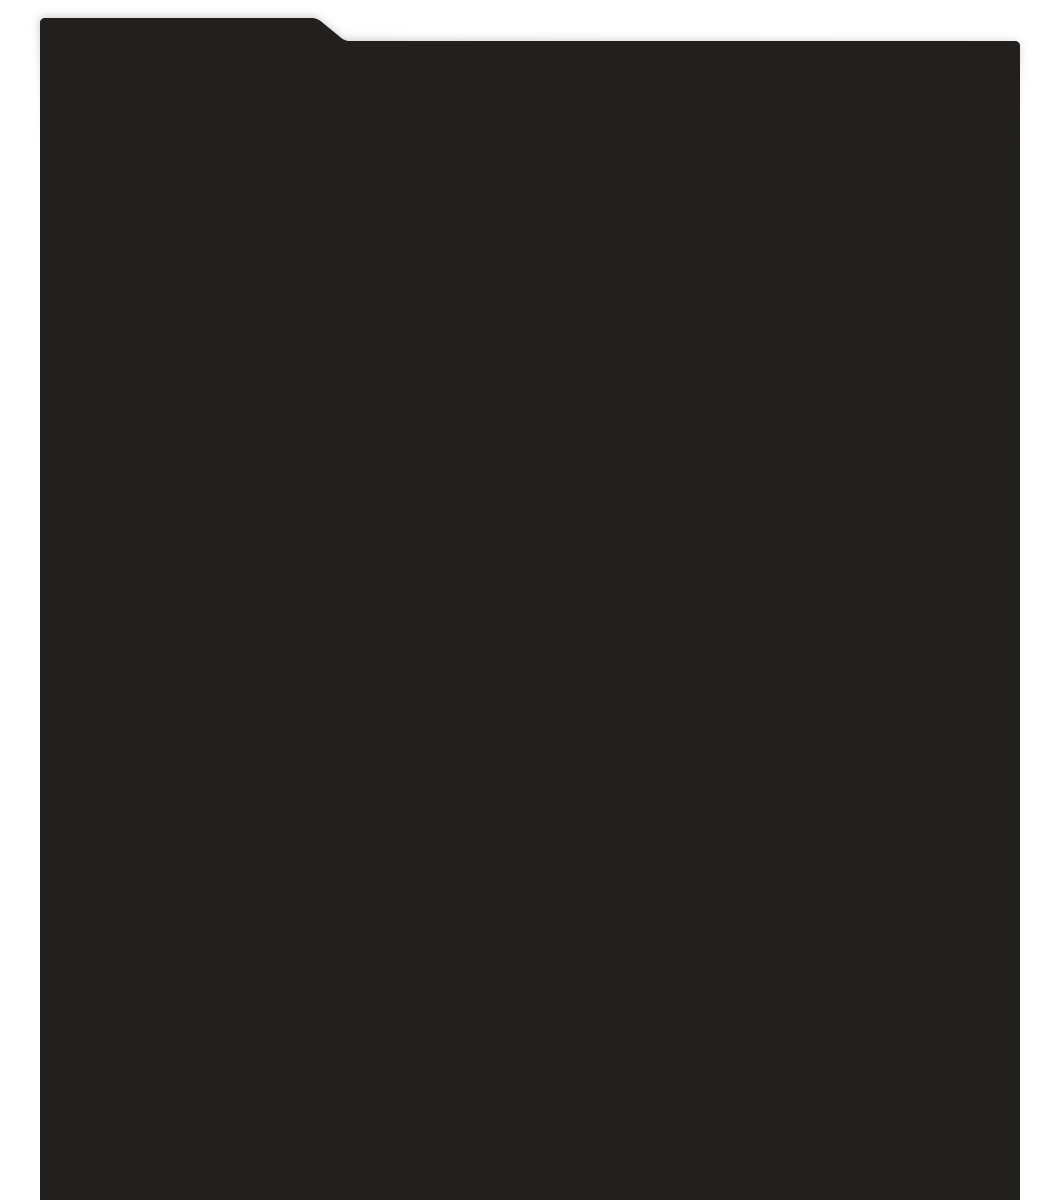
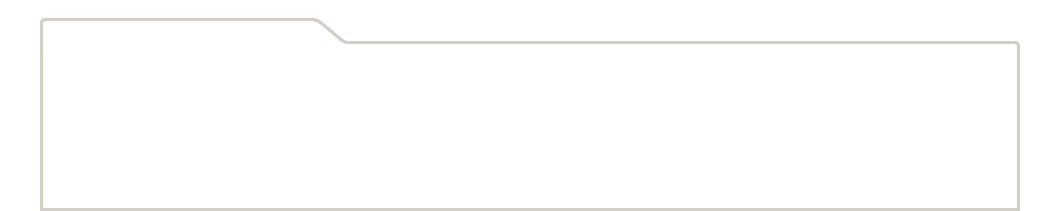
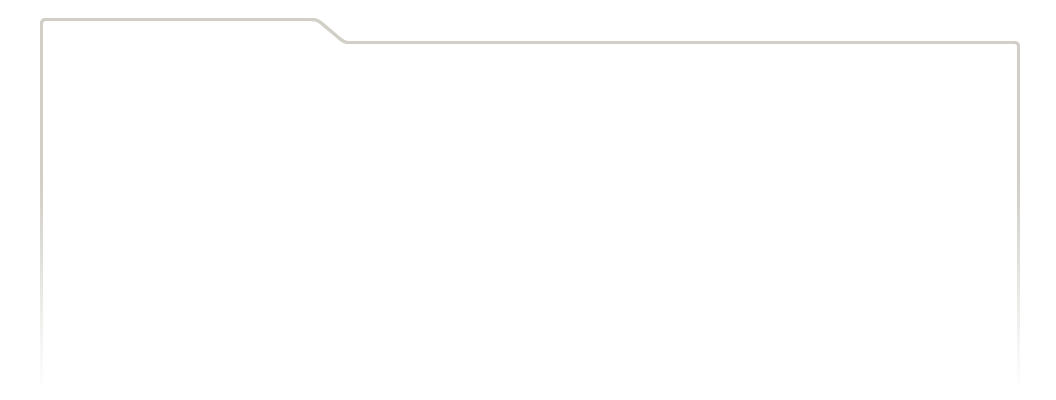
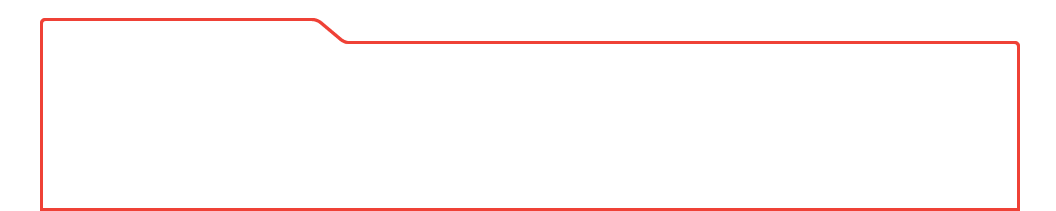
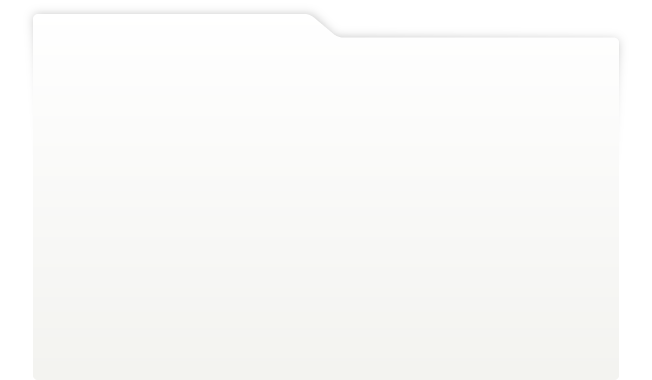
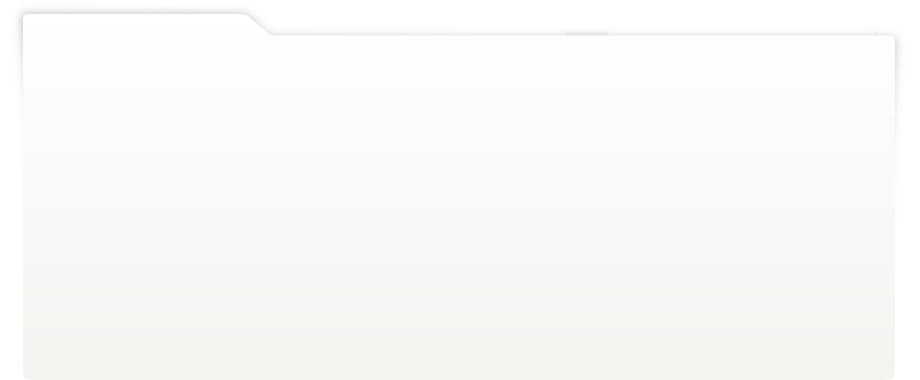
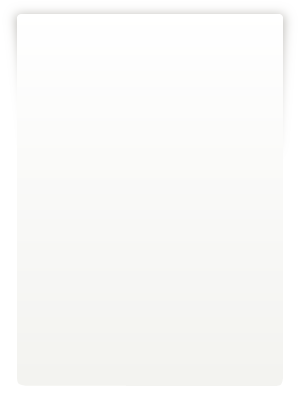
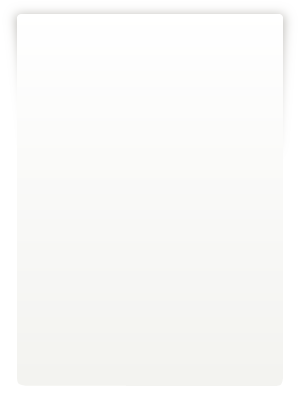
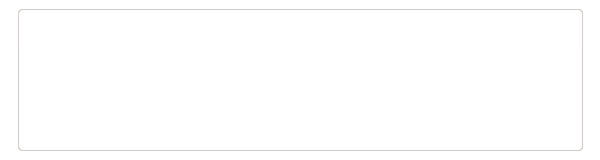
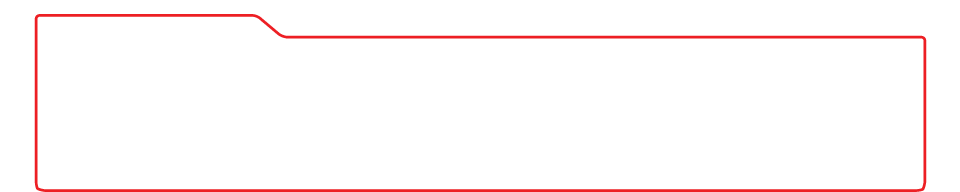
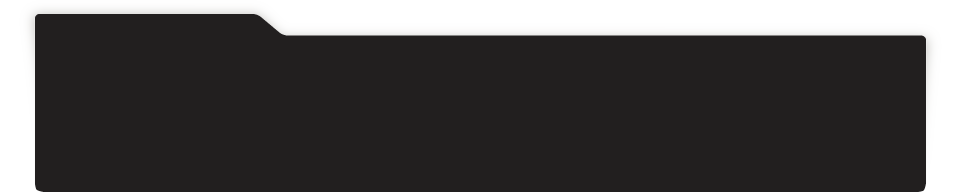
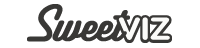
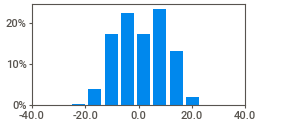
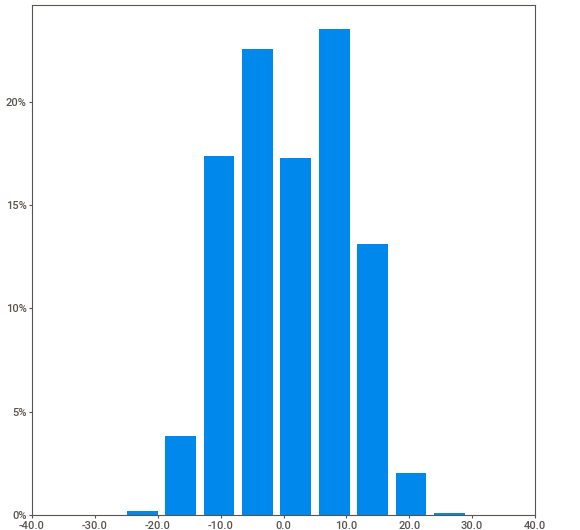
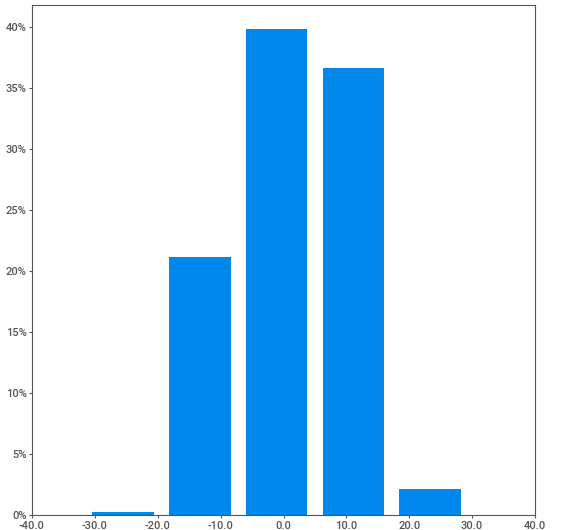
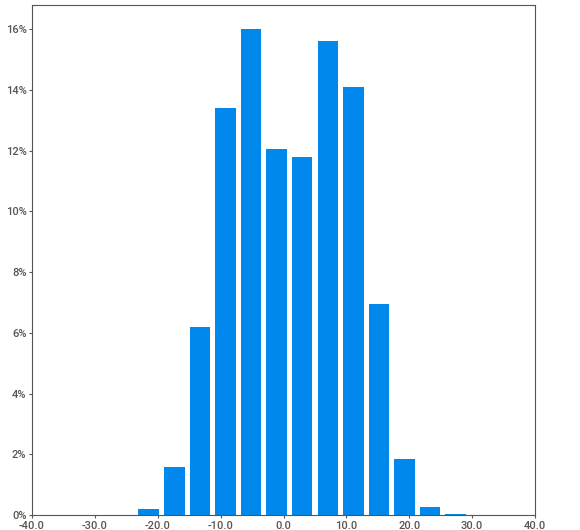
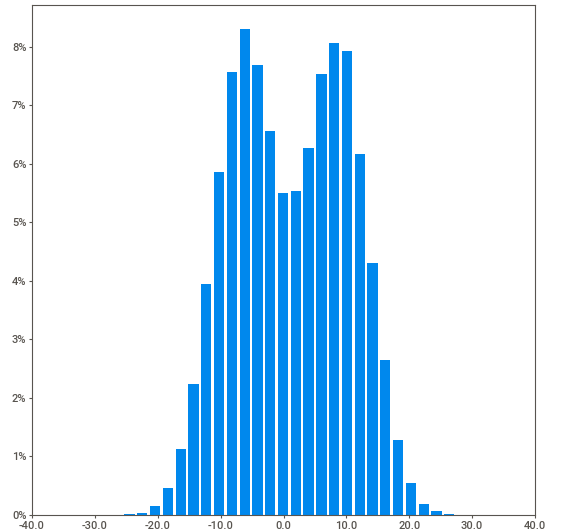
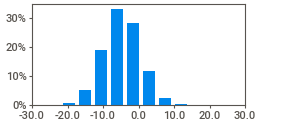
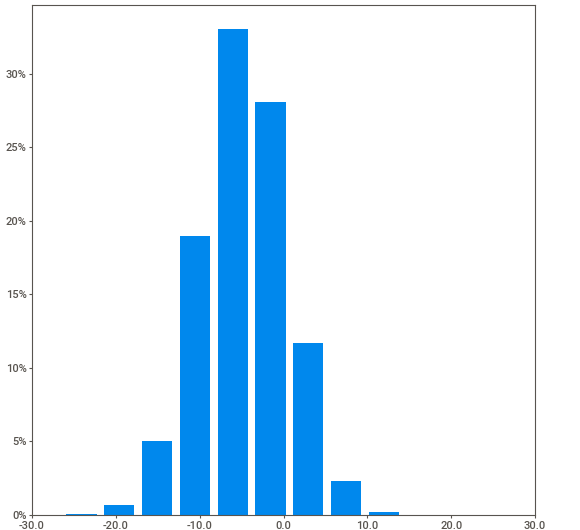
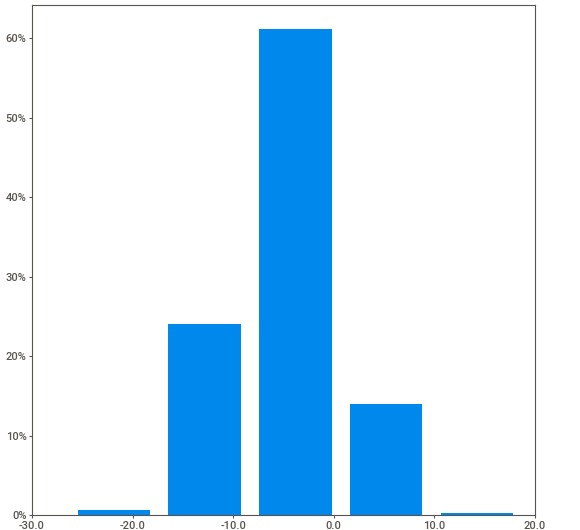
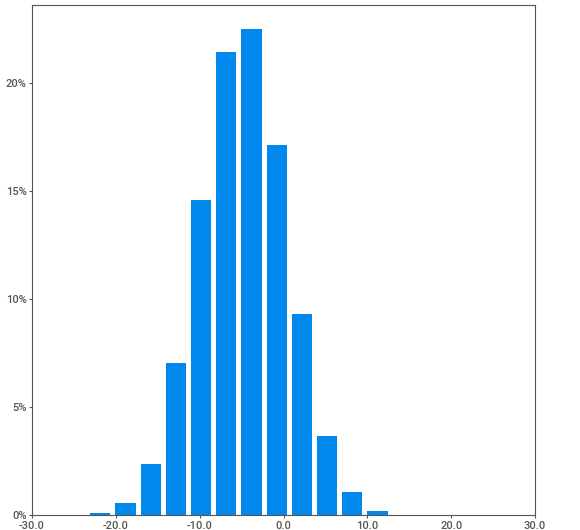
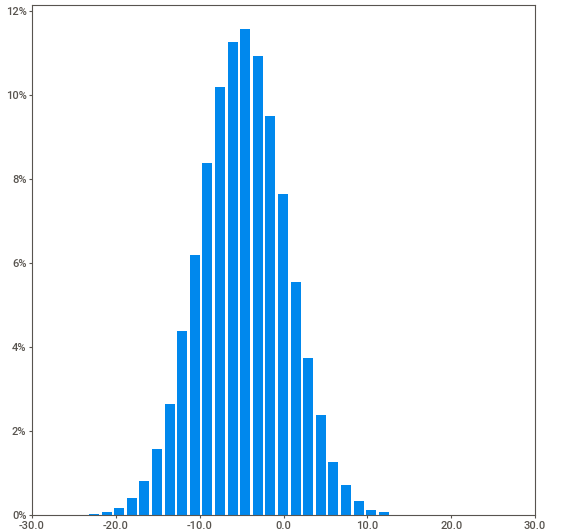
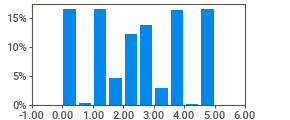
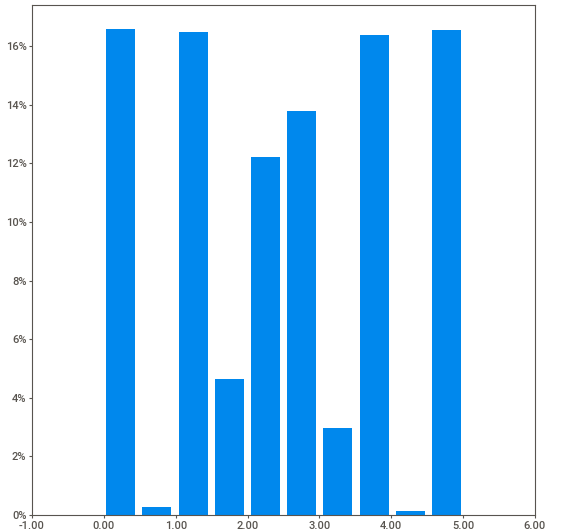
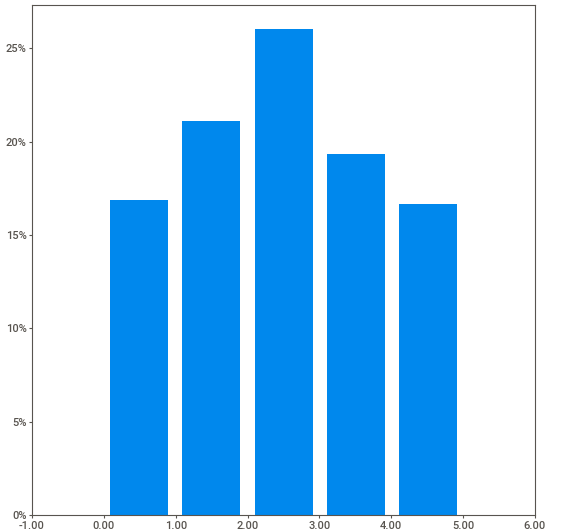
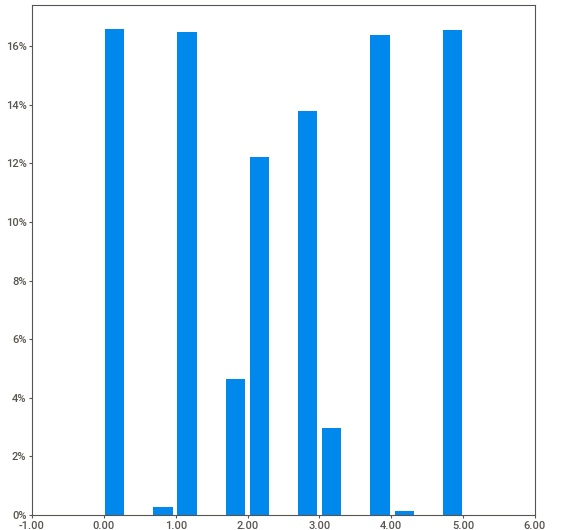
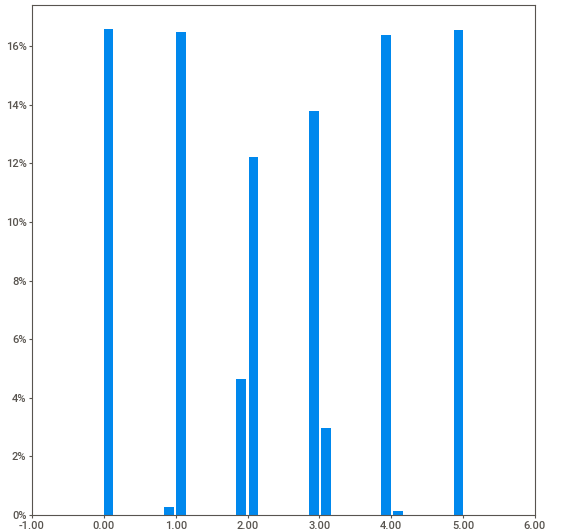
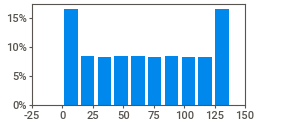
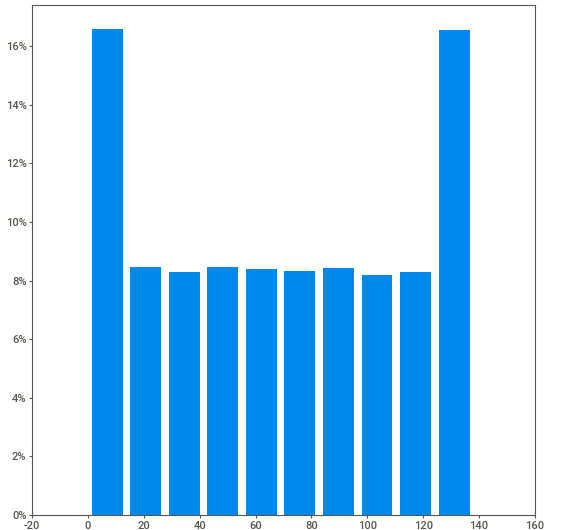
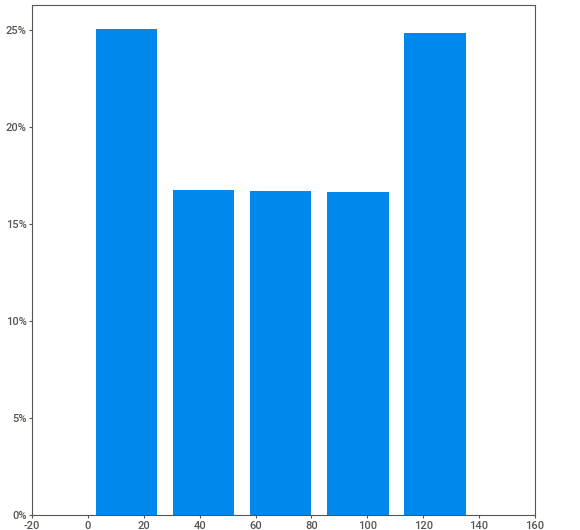
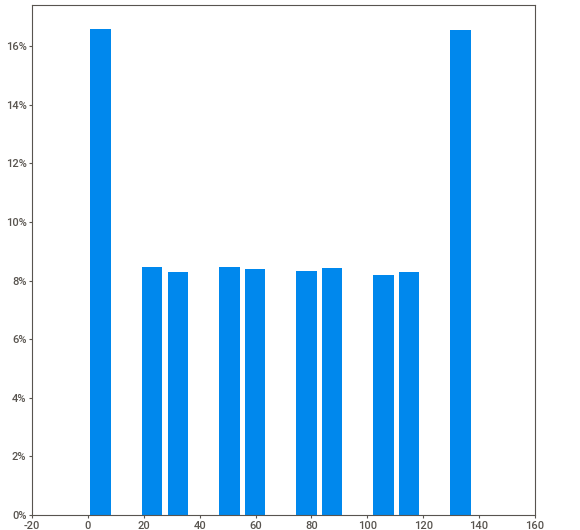
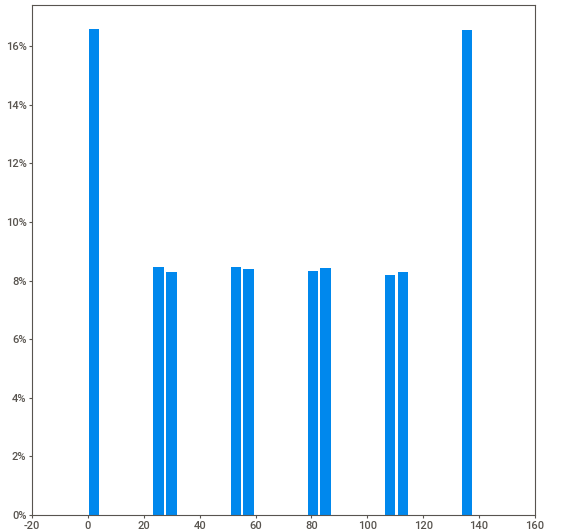
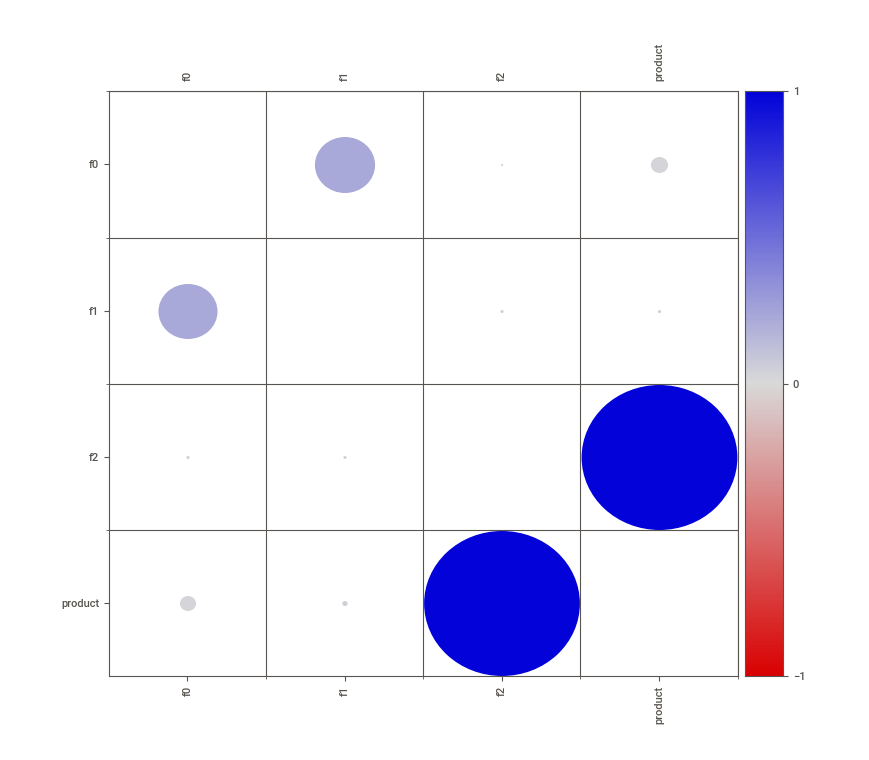
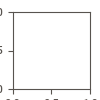

In [4]:
report_2 = sv.analyze(data2)
report_2.show_notebook()

### Region 3 overview

                                             |                                             | [  0%]   00:00 ->…


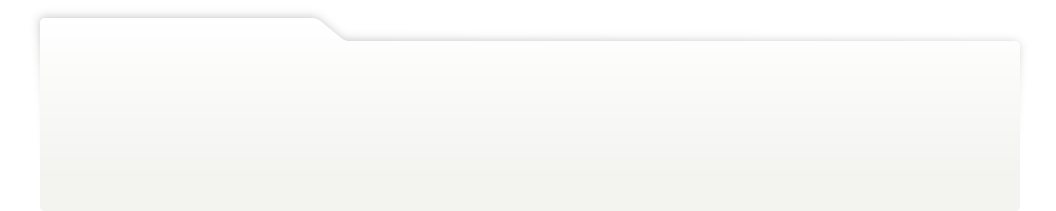
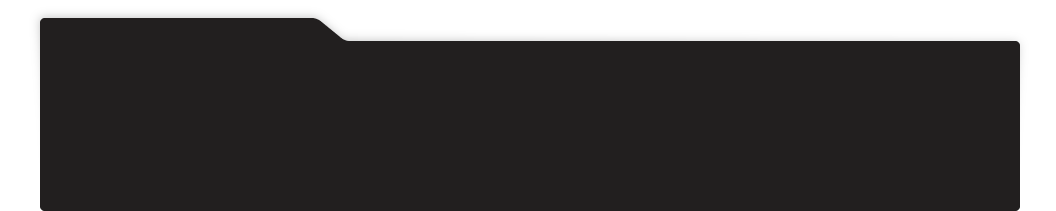
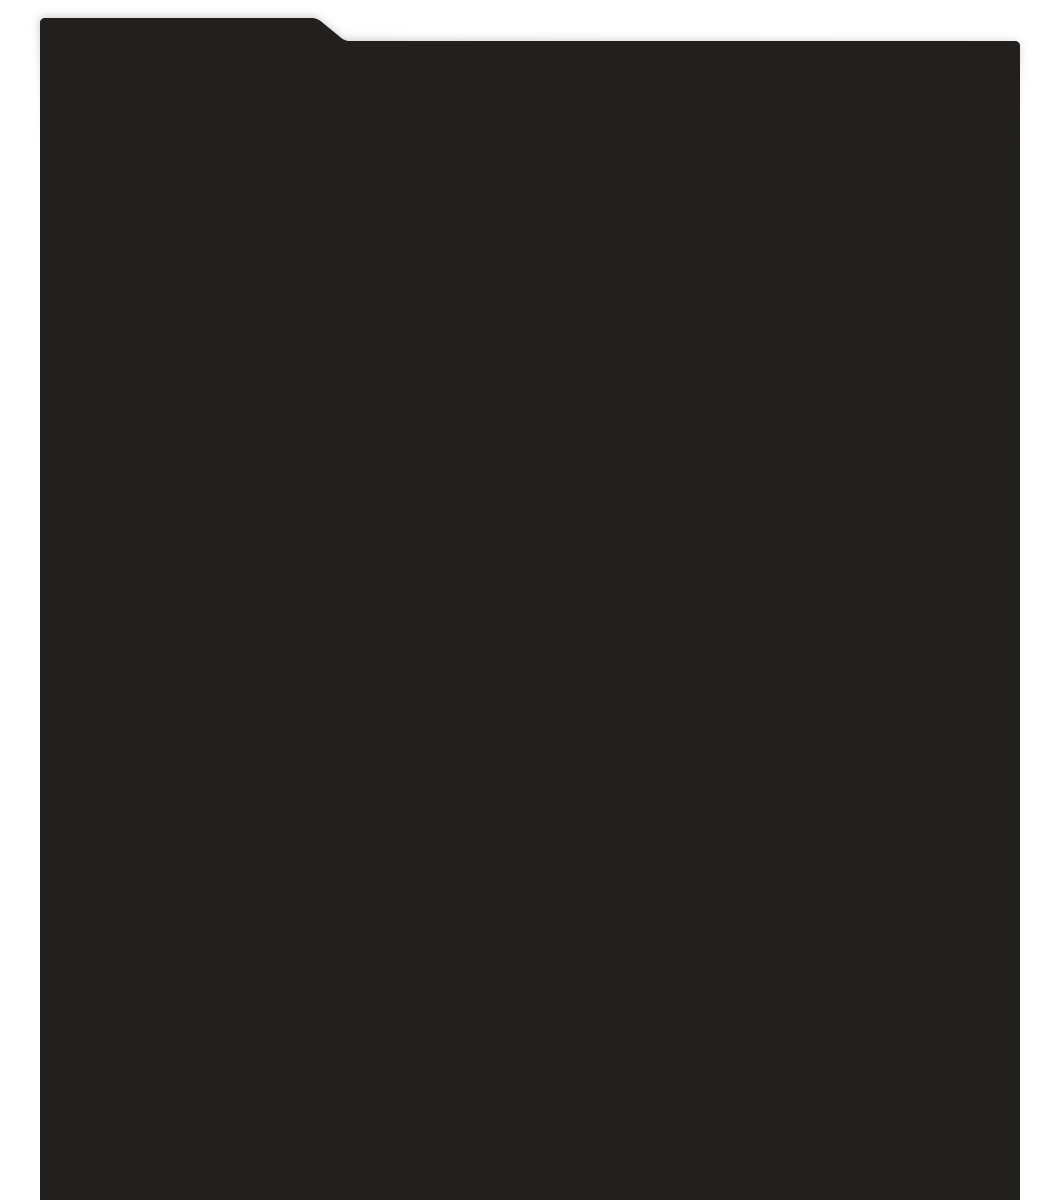
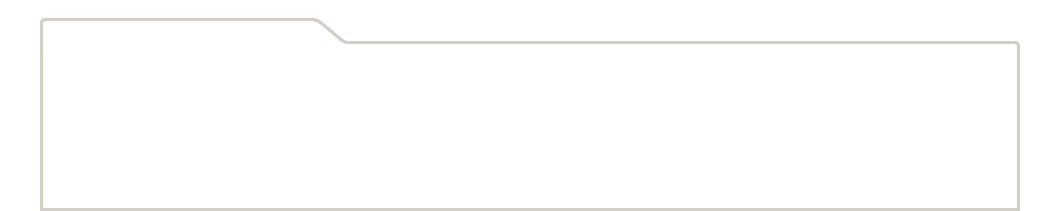
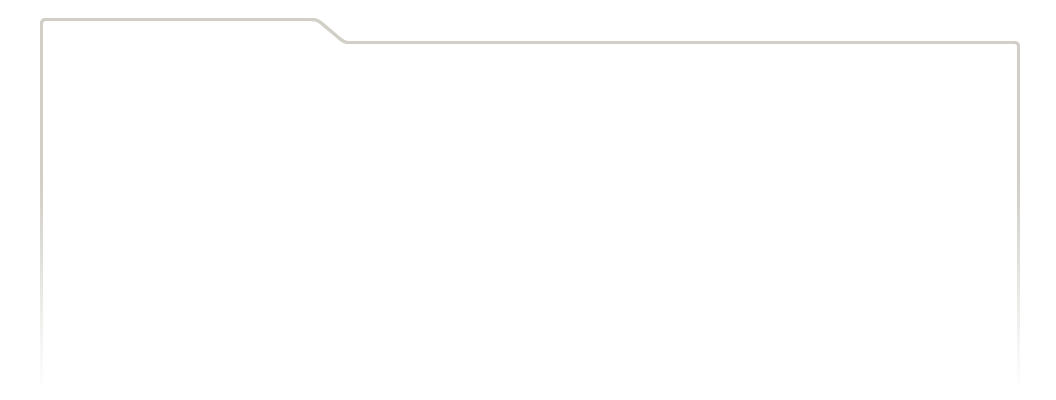
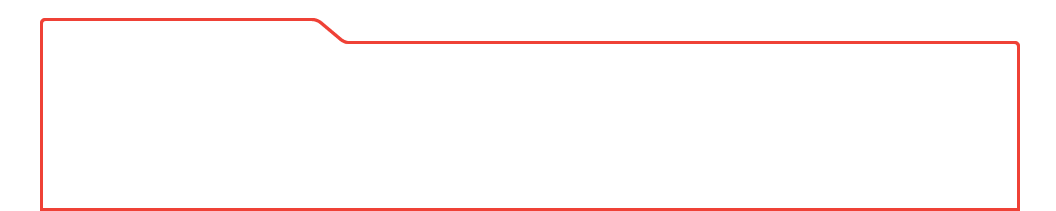
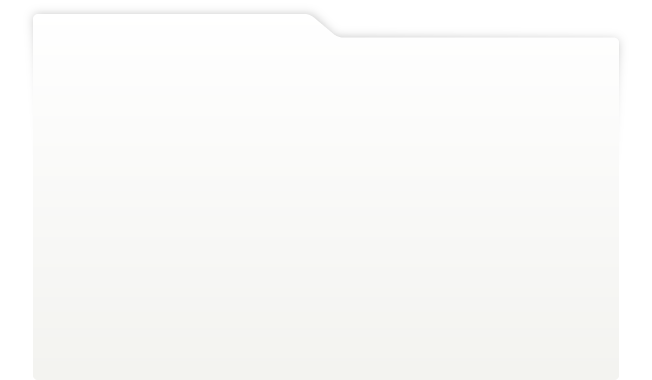
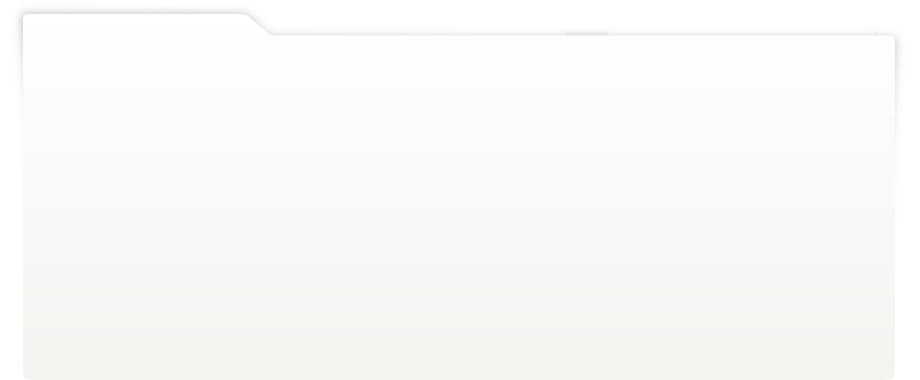
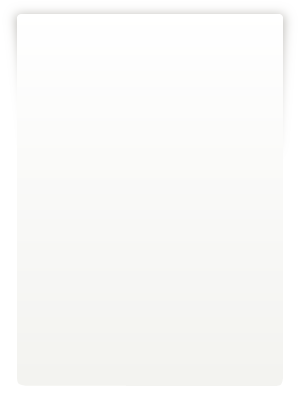
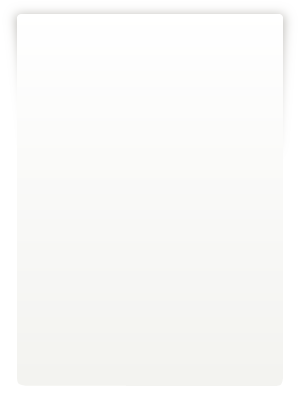
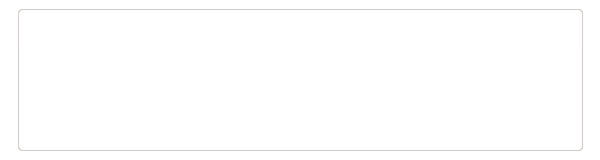
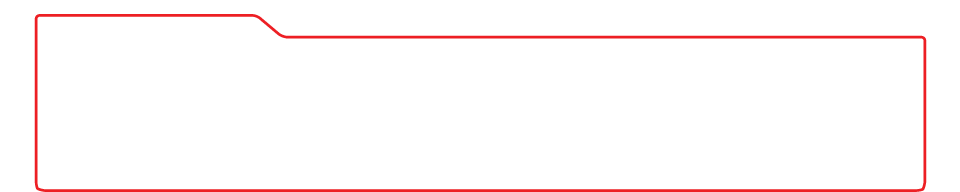
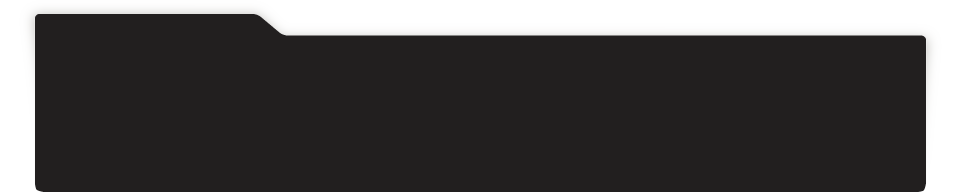
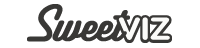
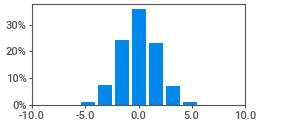
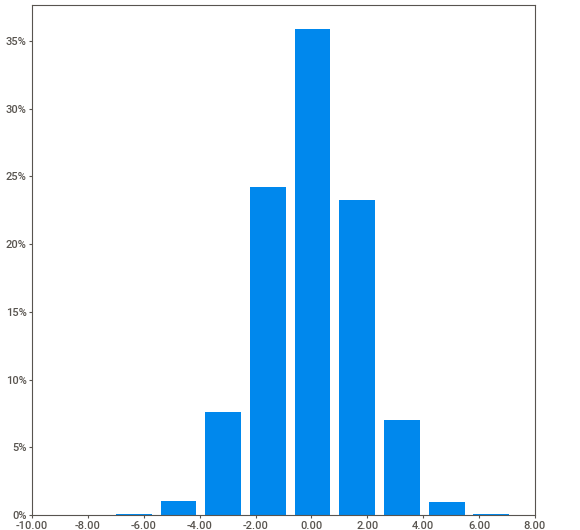
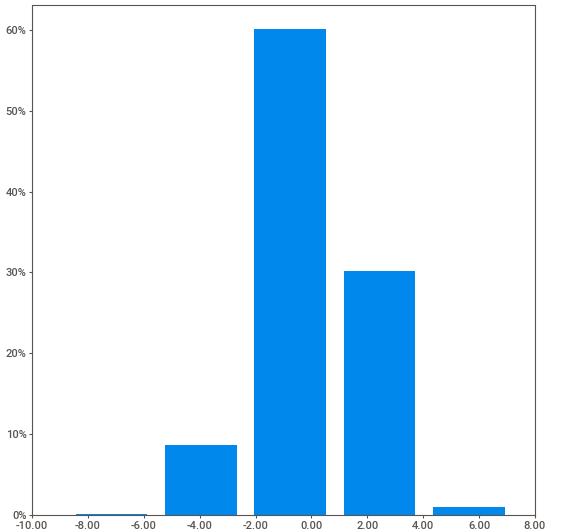
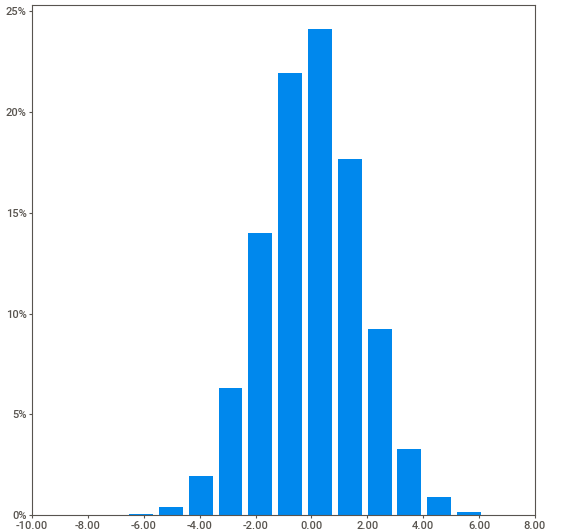
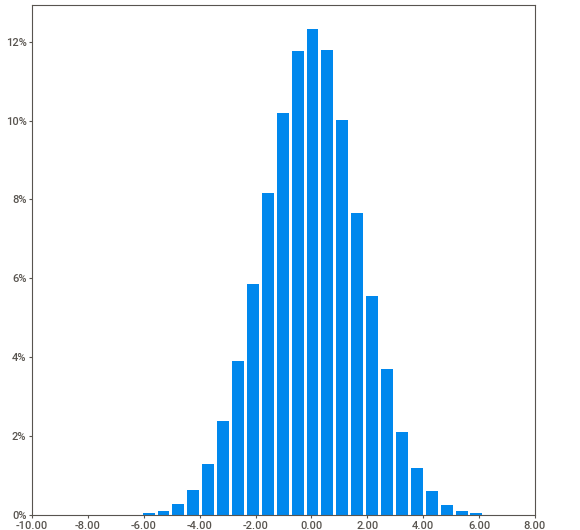
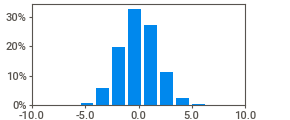
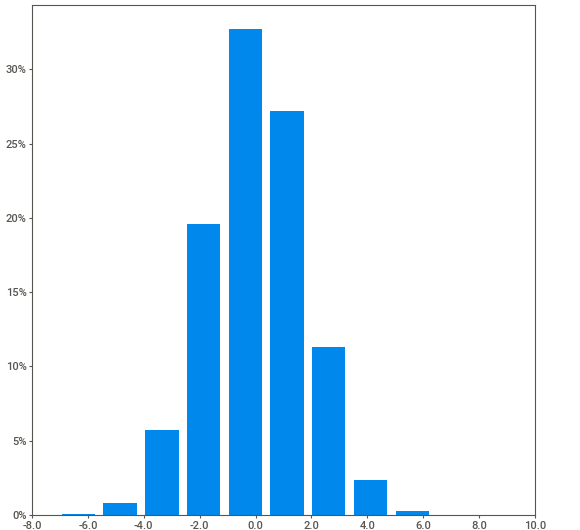
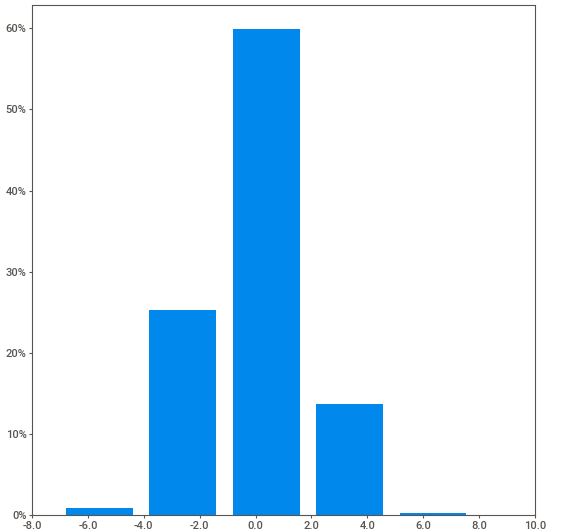
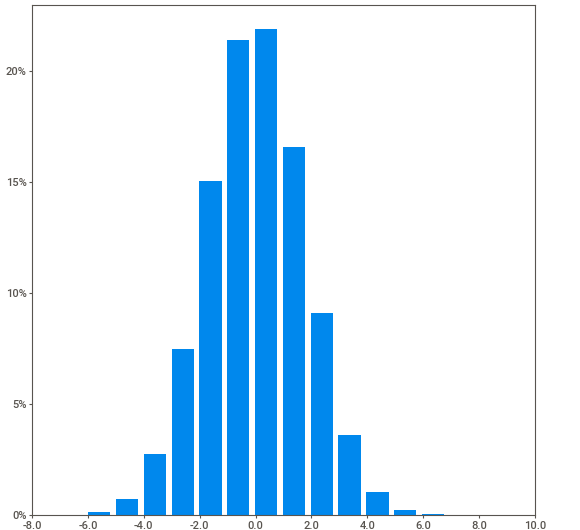
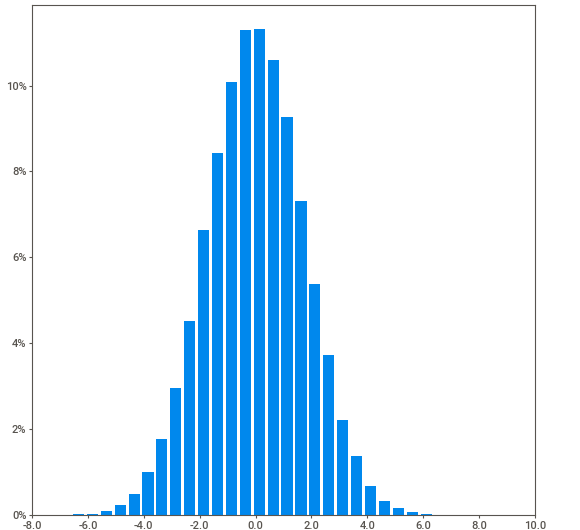
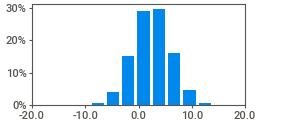
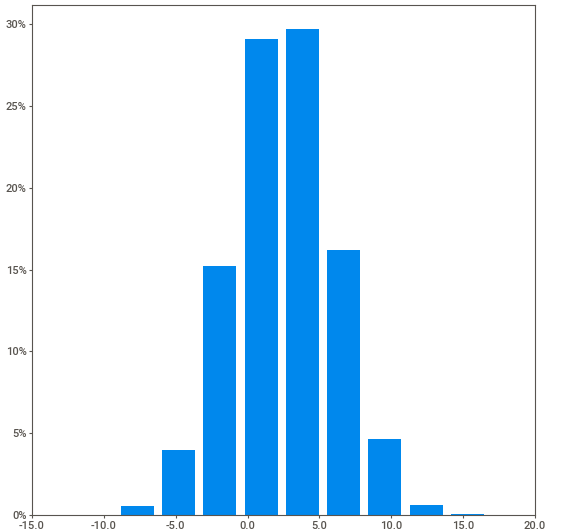
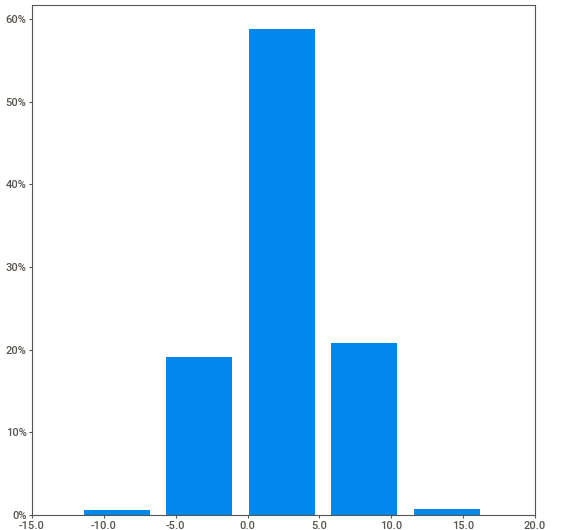
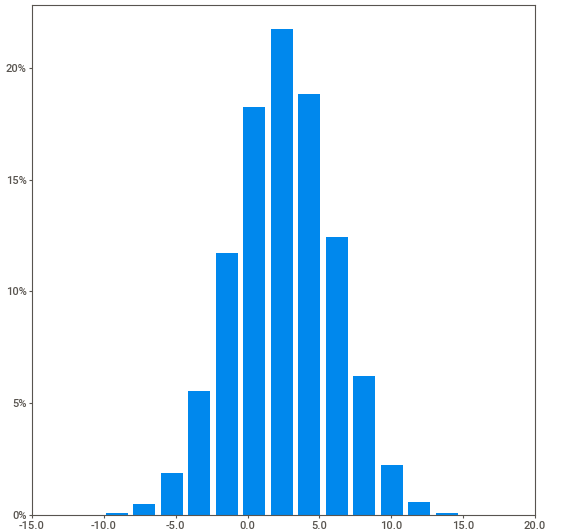
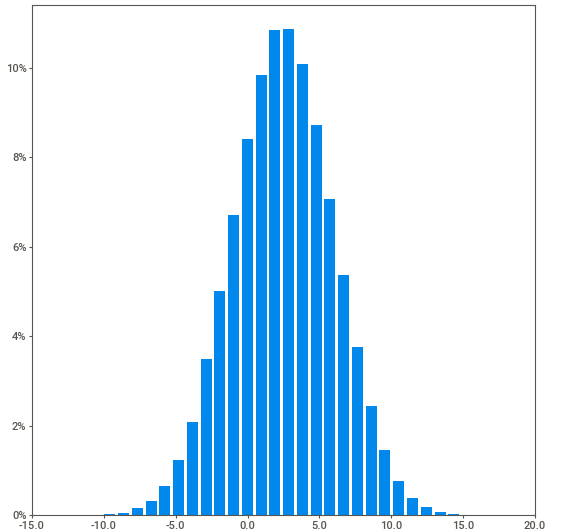
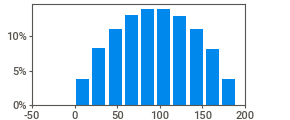
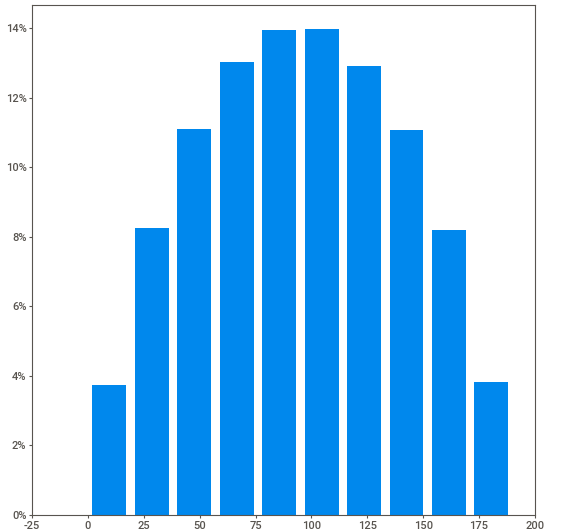
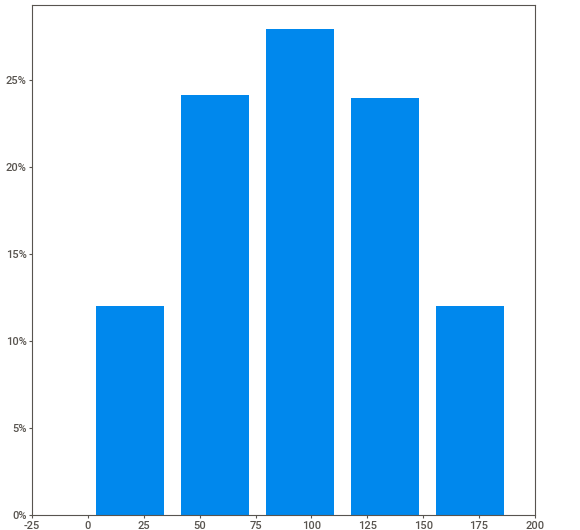
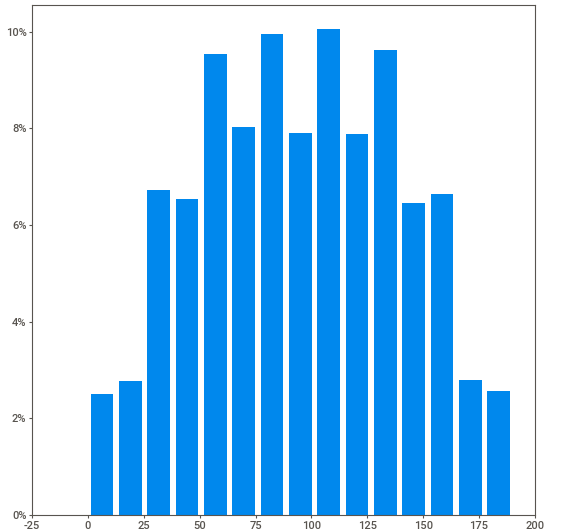
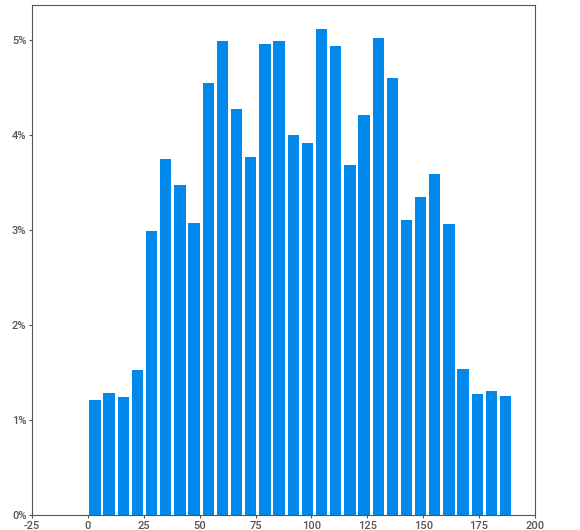
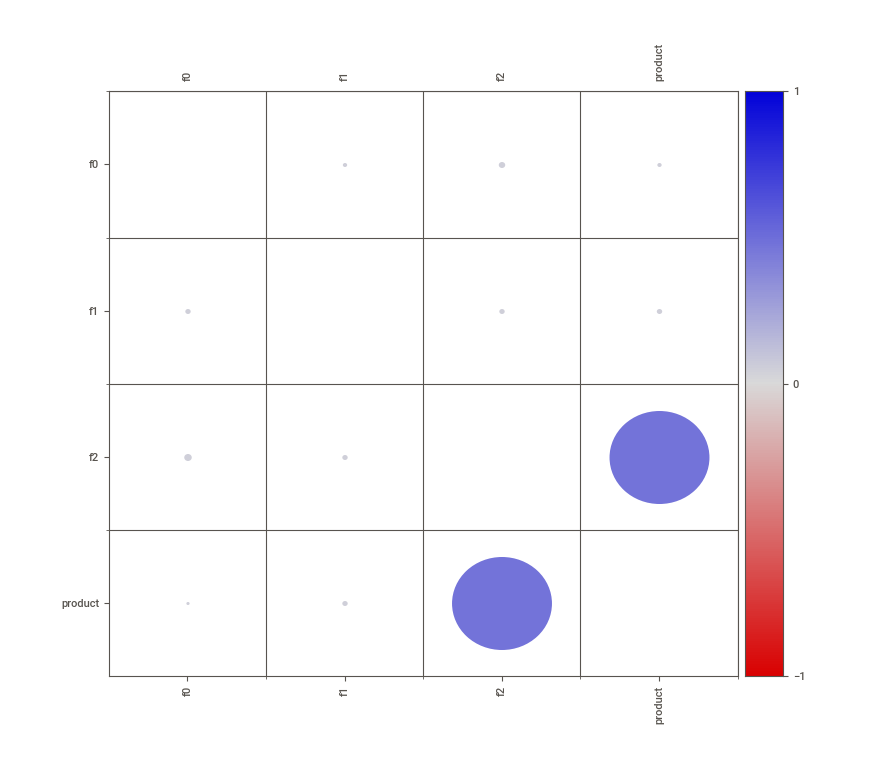
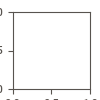

In [5]:
report_3 = sv.analyze(data3)
report_3.show_notebook()

- For some wells, the information is duplicated; perhaps there was some kind of bug when writing data to the database, or perhaps not. In any case, this point needs to be clarified with the customer.

- There are no complete row duplicates. Duplicates in the 'id' column may mean that these wells have subwells, a sub-source of production, or that it is divided into two zones. We won't delete anything.

- There is no need to scale the features since there are no relatively large or small values in each respective region.

- We can see that the data is distributed differently across regions. So it will not be possible to use the same model for all regions. We will need to create a model for each region and feed it data from that particular region in order to make accurate predictions.

- There is no correlation among the features (the correlation in the second region is between feature f2 and the target, so there is no multicollinear relationship).

### Removing unnecessary columns

The oil well id column is not relevant to the calculations. Let's delete it.

In [6]:
data1, data2, data3 = data1.drop('id', axis = 1), data2.drop('id',axis = 1), data3.drop('id', axis = 1)

## Training and testing the model

### Region 1

In [7]:
features = data1.drop('product', axis = 1)
target = data1['product']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size = 0.25,\
                                                                             random_state = 12345)

In [8]:
model = LinearRegression()
model.fit(features_train, target_train)
prediction = model.predict(features_valid)
mse = mean_squared_error(target_valid, prediction)
rmse = mse**0.5
r2 = r2_score(target_valid, prediction)
mae = mean_absolute_error(target_valid, prediction)
print(f'MSE: {mse}\n RMSE: {rmse} \n MAE: {mae} \n R2: {r2}')


MSE: 1412.2129364399243
 RMSE: 37.5794217150813 
 MAE: 30.919600777151313 
 R2: 0.27994321524487786


In [9]:
print('Average predicted raw material stock in region 1:', prediction.mean())
print('Average real stock of raw materials in region 1:', target_valid.mean())
print('Difference:' ,1- target_valid.mean() / prediction.mean())


Average predicted raw material stock in region 1: 92.59256778438035
Average real stock of raw materials in region 1: 92.07859674082927
Difference: 0.005550888757594019


The quality of this model leaves much to be desired. However, the predicted mean target value was predicted quite accurately.

### Region 2

In [10]:
prediction2 = model.predict(data2.drop('product', axis = 1))
print(prediction2.mean())
print(data2['product'].mean())

166.02600308231263
68.82500000000002


In [11]:
features2 = data2.drop('product', axis = 1)
target2 = data2['product']

features_train2, features_valid2, target_train2, target_valid2 = train_test_split(features2, target2, test_size = 0.25,\
                                                                             random_state = 12345)

In [12]:
model.fit(features_train2, target_train2)
prediction2 = model.predict(features_valid2)
mse = mean_squared_error(target_valid2, prediction2)
rmse = mse**0.5
r2 = r2_score(target_valid2, prediction2)
mae = mean_absolute_error(target_valid2, prediction2)
print(f'MSE: {mse}\n RMSE: {rmse} \n MAE: {mae} \n R2: {r2}')


MSE: 0.7976263360391154
 RMSE: 0.8930992867756168 
 MAE: 0.7187662442124758 
 R2: 0.9996233978805127


In [13]:
print('Average predicted raw material stock in region 2:', prediction2.mean())
print('Average real stock of raw materials in region 2:', target_valid2.mean())
print('Difference:' ,1- target_valid2.mean() / prediction2.mean())

Average predicted raw material stock in region 2: 68.72854689544602
Average real stock of raw materials in region 2: 68.72313602435997
Difference: 7.872814617004842e-05


R2 0.99 is a very high figure. The target prediction coincides almost perfectly with the actual values.

### Region 3

In [14]:
features3 = data3.drop('product', axis = 1)
target3 = data3['product']

features_train3, features_valid3, target_train3, target_valid3 = train_test_split(features3, target3, test_size = 0.25,\
                                                                             random_state = 12345)

In [15]:
model.fit(features_train3, target_train3)
prediction3 = model.predict(features_valid3)
mse = mean_squared_error(target_valid3, prediction3)
rmse = mse**0.5
r2 = r2_score(target_valid3, prediction3)
mae = mean_absolute_error(target_valid3, prediction3)
print(f'MSE: {mse}\n RMSE: {rmse} \n MAE: {mae} \n R2: {r2}')


MSE: 1602.3775813236196
 RMSE: 40.02970873393434 
 MAE: 32.792652105481814 
 R2: 0.20524758386040443


In [16]:
print('Average predicted raw material stock in region 3:', prediction3.mean())
print('Average real stock of raw materials in region 3:', target_valid3.mean())
print('Difference:' ,1- target_valid3.mean() / prediction3.mean())

Average predicted raw material stock in region 3: 94.96504596800489
Average real stock of raw materials in region 3: 94.88423280885438
Difference: 0.000850977939585662


Here is where the model predicts the worst, but the target average matches quite well.

Conclusion:
- The average real and predicted reserves of raw materials are highest in the third region.
- The model predicts best in the second region.

## Preparation for profit calculation

### Preface
- When exploring a region, 500 points are examined, from which, using machine learning, the best 200 are selected for development.
- The budget for well development in the region is 10 billion rubles.
- At current prices, one barrel of raw materials brings 450 rubles in income. The income from each unit of product is 450 thousand rubles, since the volume is indicated in thousands of barrels.
- After assessing the risks, we need to leave only those regions in which the probability of losses is less than 2.5%. Among them, the region with the highest average profit is selected.
- Synthetic data: details of contracts and characteristics of fields are not disclosed.

In [17]:
# RETRIEVED CONSTANTS

BUDGET = 10**10
BARREL_PROFIT = 450
PRODUCT_PROFIT = BARREL_PROFIT*1000
BEST_WELLS = 200
EXAMINED_WELLS = 500

###  Calculating the required volume of an oil well to avoid losses

In [18]:
MINIMAL_UNITS = round(BUDGET / BEST_WELLS / PRODUCT_PROFIT, 3)
print(f'Volume of raw materials for break-even development of a new well: {MINIMAL_UNITS} units of product per well' )

Volume of raw materials for break-even development of a new well: 111.111 units of product per well


- We divide the budget by 200 oil wells that must be built. 50,000,000 rubles are allocated for each oil well. Each unit of goods is sold for 450,000 rubles. If we divide the 50,000,000 allocated to an oil well by 450,000, we get the minimum number of units that an oil well must have in order to avoid losses. In this case: 111.111 units (= MINIMAL_UNITS).

- This is much more than the average number of units in the regions (92.68 and 95, respectively). But the sample which the average is made over is 25,000 elements. It may happen that by selecting the top 200 oil wells, the average increases significantly (the greater the sample, the greater the precision). The region that the model predicts best is region two, and this is the region that has an average of 68 units of product (where there are fewer). We will use the bootstrap method for further exploration.

### A function for calculating the revenue

In [19]:
def revenue(target, predictions, count):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected = target[predictions_sorted.index][:count]
    return PRODUCT_PROFIT * selected.sum() - BUDGET

- The revenue() function calculates and returns revenue. It receives as input:

     - list of actual values (target) - product units
     - list of predictions (predictions) - the model predicts product units
     - how many wells we want to build (count)
    
The function should select wells with the highest predicted number of units of product and calculate the possible profit by summing up the number of units of all 200 wells and multiplying by revenue per unit (PRODUCT_PROFIT).

## Calculation of profits and risks

### Bootstrap function

Using this function, we will be randomly taking 500 target items and their corresponding predictions 1000 times, and passing the samples into the revenue() function in order to calculate the revenue. All 1000 revenue values will be stored in the "values" variable. From values, we will subsequently extract the average value and the lower and upper quantiles between which this average value can be obtained with a probability of 95%.

In [20]:
def bootstrap(target, prediction):
    state = np.random.RandomState(12345)

    values = []

    for i in range(1000):
    
        target_subsample = target.sample(replace = True, random_state = state, n = EXAMINED_WELLS)
        predictions_subsample = prediction[target_subsample.index]
        values.append(revenue(target_subsample, predictions_subsample, BEST_WELLS))

    values = pd.Series(values)
    
    return values

Let's convert the predictions to Series format so that the bootstrap function works.

In [21]:
prediction3 = pd.Series(prediction3, index = target_valid3.index)
prediction2 = pd.Series(prediction2, index = target_valid2.index)
prediction = pd.Series(prediction, index = target_valid.index)

### Calculating profits and risks

In [22]:
values1 = bootstrap(target_valid, prediction)
values2 = bootstrap(target_valid2, prediction2)
values3 = bootstrap(target_valid3, prediction3)

In [23]:
lower1 = values1.quantile(0.025)
upper1 = values1.quantile(0.975)
mean1 = values1.mean()
risk1= st.percentileofscore(values1, 0, kind = 'strict')#<-- this function calculates the probability of
# finding profit values below zero 

lower2 = values2.quantile(0.025)
upper2 = values2.quantile(0.975)
mean2 = values2.mean()
risk2= st.percentileofscore(values2, 0, kind = 'strict')

lower3 = values3.quantile(0.025)
upper3 = values3.quantile(0.975)
mean3 = values3.mean()
risk3= st.percentileofscore(values3, 0, kind = 'strict')

print(f'Confidence interval of the first region:\n {lower1} - {upper1} \n Average profit of the first region: {mean1}\n \
Loss risk: {risk1}%')
print('')
print('')
print(f'Confidence interval of the second region:\n {lower2} - {upper2} \n Average profit of the second region: {mean2}\n \
Loss risk: {risk2}%')
print('')
print('')
print(f'Confidence interval of the third region:\n {lower3} - {upper3} \n Average profit of the third region: {mean3}\n \
Loss risk: {risk3}%')

table = {'Quantile 2.5%' : [lower1, lower2, lower3], 'Quantile 97.5%' : [upper1, upper2, upper3],\
         'Risk of loss' : [risk1, risk2, risk3]}

table = pd.DataFrame(table, index = ['Region 1', 'Region 2', 'Region 3'])

table['Risk of loss'] = table['Risk of loss'].apply(lambda x: str(x) + '%')


Confidence interval of the first region:
 -102090094.83793654 - 947976353.3583689 
 Average profit of the first region: 425938526.91059244
 Loss risk: 6.0%


Confidence interval of the second region:
 68873225.37050176 - 931547591.2570494 
 Average profit of the second region: 515222773.4432899
 Loss risk: 1.0%


Confidence interval of the third region:
 -128880547.32978901 - 969706954.1802661 
 Average profit of the third region: 435008362.7827556
 Loss risk: 6.4%


In [24]:
display(table)


,Quantile 2.5%,Quantile 97.5%,Risk of loss
Region 1,-1.020901e+08,9.479764e+08,6.0%
Region 2,6.887323e+07,9.315476e+08,1.0%
Region 3,-1.288805e+08,9.697070e+08,6.4%


Conclusion:

- According to preliminary estimates, region 2 was not suitable for well development. The region's average reserves (68.73) are much less than those of other regions (92-95) and the calculated reserves for break-even field development (111.111). But, thanks to a high-quality forecasting model, the most optimistic forecasts concern region 2 - the risk of losses is only 1%. And it is this region that is proposed for development based on the research conducted.

## Conclusion

While working on this project the following was carried out:

- The data has been studied.
- A linear regression model was created for each region and the quality of each model was assessed according to MSE, RMSE, MAE and R2. The region 2 model turned out to be the most accurate.
- The average actual reserves of each region were compared with those predicted by the model:
     - The regions with the largest inventories were Region 1 and Region 3, with 92 and 95 units of product, respectively. -   - Region 2 averaged just 68 units.
- The required volume of an oil well to avoid losses is calculated at 111.111 units. of product.
- The average revenue for each region was estimated, as well as quantiles, between which the average revenue can be found with a probability of 95%.
- Conclusively, Region 2 was established as the most recommended for the creation of new oil wells, with a confidence interval of $[6.88 x 10^7, 9.32 x 10^8]$ and a risk of loss of only 1.0 %.





